# Setup

In [9]:
from yahoo_historical import Fetcher
from datetime import timedelta, datetime
from dataclasses import dataclass
from functools import reduce
import pandas as pd
import numpy as np

Setup inline plotting, then override the chart size (in inches).

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]

In [17]:
start_date=[2014,1,1]
end_date=[2020,12,28]
# SP500
ticker='%5EGSPC'

In [4]:
raw = Fetcher(ticker, start_date, end_date).get_historical()
data=raw.set_index('Date')
display(data)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,1845.859985,1845.859985,1827.739990,1831.979980,1831.979980,3080600000
2014-01-03,1833.209961,1838.239990,1829.130005,1831.369995,1831.369995,2774270000
2014-01-06,1832.310059,1837.160034,1823.729980,1826.770020,1826.770020,3294850000
2014-01-07,1828.709961,1840.099976,1828.709961,1837.880005,1837.880005,3511750000
2014-01-08,1837.900024,1840.020020,1831.400024,1837.489990,1837.489990,3652140000
...,...,...,...,...,...,...
2020-12-18,3722.389893,3726.699951,3685.840088,3709.409912,3709.409912,7068340000
2020-12-21,3684.280029,3702.899902,3636.479980,3694.919922,3694.919922,4732160000
2020-12-22,3698.080078,3698.260010,3676.159912,3687.260010,3687.260010,4023940000


Need to drop column `Volume` as its value is way larger than that of the other columns it will suppress the other columns when plotting.

In [5]:
data=data.drop(columns=['Volume'])
display(data)

,Open,High,Low,Close,Adj Close
Date,,,,,
2014-01-02,1845.859985,1845.859985,1827.739990,1831.979980,1831.979980
2014-01-03,1833.209961,1838.239990,1829.130005,1831.369995,1831.369995
2014-01-06,1832.310059,1837.160034,1823.729980,1826.770020,1826.770020
2014-01-07,1828.709961,1840.099976,1828.709961,1837.880005,1837.880005
2014-01-08,1837.900024,1840.020020,1831.400024,1837.489990,1837.489990
...,...,...,...,...,...
2020-12-18,3722.389893,3726.699951,3685.840088,3709.409912,3709.409912
2020-12-21,3684.280029,3702.899902,3636.479980,3694.919922,3694.919922
2020-12-22,3698.080078,3698.260010,3676.159912,3687.260010,3687.260010


[rolling](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) creates a rolling window and uses data in the window to do further calculation. The following is to to calculate 50-days moving average closing and assign value to field `SMA`. 

In [6]:
data['SMA'] = data['Close'].rolling(50).mean()
data.head(50)

,Open,High,Low,Close,Adj Close,SMA
Date,,,,,,
2014-01-02,1845.859985,1845.859985,1827.739990,1831.979980,1831.979980,NaN
2014-01-03,1833.209961,1838.239990,1829.130005,1831.369995,1831.369995,NaN
2014-01-06,1832.310059,1837.160034,1823.729980,1826.770020,1826.770020,NaN
2014-01-07,1828.709961,1840.099976,1828.709961,1837.880005,1837.880005,NaN
2014-01-08,1837.900024,1840.020020,1831.400024,1837.489990,1837.489990,NaN
2014-01-09,1839.000000,1843.229980,1830.380005,1838.130005,1838.130005,NaN
2014-01-10,1840.060059,1843.150024,1832.430054,1842.369995,1842.369995,NaN
2014-01-13,1841.260010,1843.449951,1815.520020,1819.199951,1819.199951,NaN
2014-01-14,1821.359985,1839.260010,1821.359985,1838.880005,1838.880005,NaN


Notice the first 49 days do not have SMA.
Let's plot the first 200 days.

<AxesSubplot:xlabel='Date'>

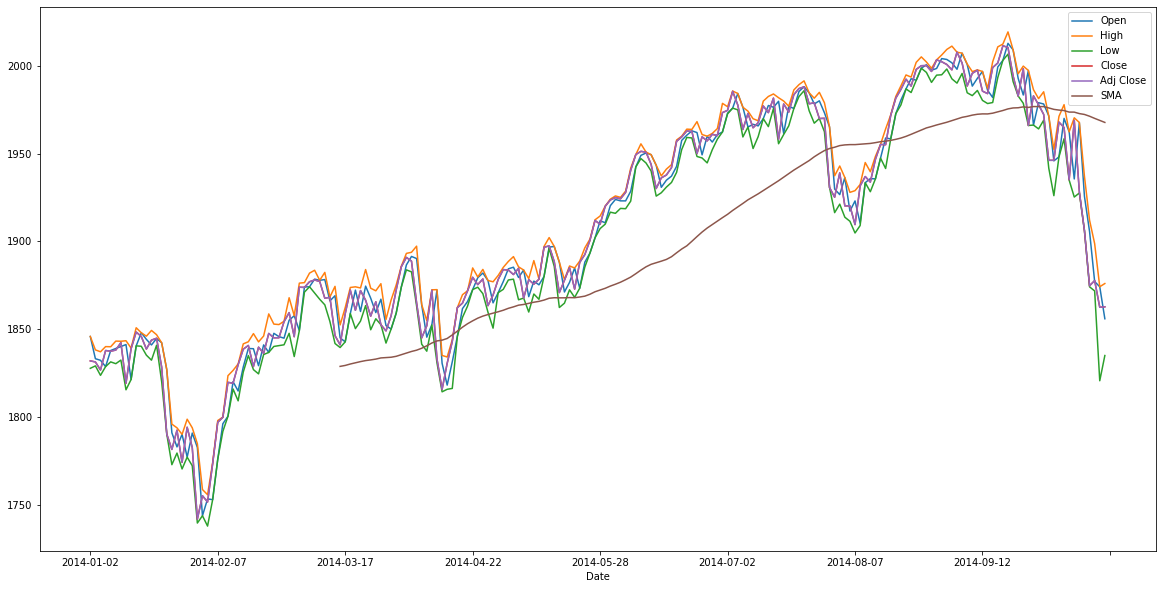

In [7]:
data.head(200).plot()

All data.

<AxesSubplot:xlabel='Date'>

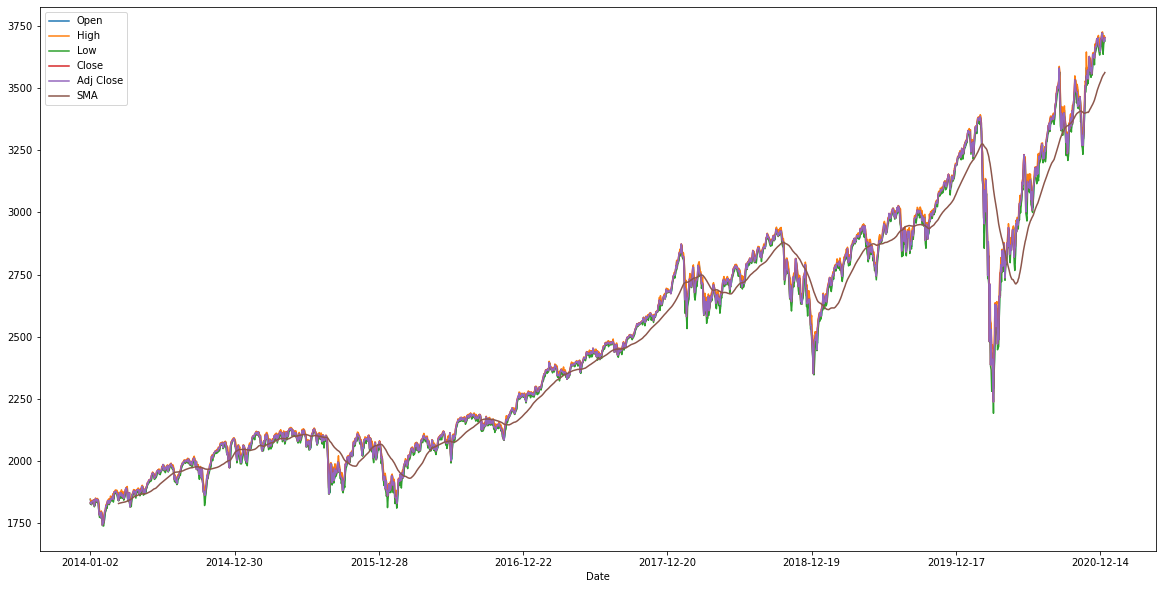

In [8]:
data.plot()

## A simple backtest

This strategy calculates a slow moving average (100-day) and compares it with a fast moving average (50-day). We will long if the faster moving average is above the slower, othewise we are going to be flat.
The following code sets `Position` to 1 if the faster moving average is above the slower one.

In [12]:
data['SMA100'] = data['Close'].rolling(100).mean()
data['Position']=np.where(data['SMA']>data['SMA100'],1,0)
display(data)

,Open,High,Low,Close,Adj Close,SMA,SMA100,Position
Date,,,,,,,,
2014-01-02,1845.859985,1845.859985,1827.739990,1831.979980,1831.979980,NaN,NaN,0
2014-01-03,1833.209961,1838.239990,1829.130005,1831.369995,1831.369995,NaN,NaN,0
2014-01-06,1832.310059,1837.160034,1823.729980,1826.770020,1826.770020,NaN,NaN,0
2014-01-07,1828.709961,1840.099976,1828.709961,1837.880005,1837.880005,NaN,NaN,0
2014-01-08,1837.900024,1840.020020,1831.400024,1837.489990,1837.489990,NaN,NaN,0
...,...,...,...,...,...,...,...,...
2020-12-18,3722.389893,3726.699951,3685.840088,3709.409912,3709.409912,3547.944990,3461.814102,1
2020-12-21,3684.280029,3702.899902,3636.479980,3694.919922,3694.919922,3552.300591,3466.301101,1
2020-12-22,3698.080078,3698.260010,3676.159912,3687.260010,3687.260010,3555.361392,3470.462500,1


Since we are using closing so the actualy trading would happen on the next day, so we should [shift](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shift.html?highlight=shift#pandas.DataFrame.shift) the trade by one day.

In [13]:
data['Position']=data['Position'].shift()

Next we calculate the daily percentage change. Note when `Position` is `1` we long at the previous day closing, so the value change in percentage of the new long position on a `Position==1` day can be calcualted from the [percentage change](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pct_change.html?highlight=pct_change#pandas.DataFrame.pct_change) of that day's closing to the previous day's closing (buy price).

In [15]:
data['StrategyPct']=data['Close'].pct_change(1) * data['Position']
display(data)

,Open,High,Low,Close,Adj Close,SMA,SMA100,Position,StrategyPct
Date,,,,,,,,,
2014-01-02,1845.859985,1845.859985,1827.739990,1831.979980,1831.979980,NaN,NaN,NaN,NaN
2014-01-03,1833.209961,1838.239990,1829.130005,1831.369995,1831.369995,NaN,NaN,0.0,-0.000000
2014-01-06,1832.310059,1837.160034,1823.729980,1826.770020,1826.770020,NaN,NaN,0.0,-0.000000
2014-01-07,1828.709961,1840.099976,1828.709961,1837.880005,1837.880005,NaN,NaN,0.0,0.000000
2014-01-08,1837.900024,1840.020020,1831.400024,1837.489990,1837.489990,NaN,NaN,0.0,-0.000000
...,...,...,...,...,...,...,...,...,...
2020-12-18,3722.389893,3726.699951,3685.840088,3709.409912,3709.409912,3547.944990,3461.814102,1.0,-0.003511
2020-12-21,3684.280029,3702.899902,3636.479980,3694.919922,3694.919922,3552.300591,3466.301101,1.0,-0.003906
2020-12-22,3698.080078,3698.260010,3676.159912,3687.260010,3687.260010,3555.361392,3470.462500,1.0,-0.002073


Then we accumulate the percentage change, which is the cumulative returns.

In [16]:
data['Strategy']=(data['StrategyPct']+1).cumprod()
display(data)

,Open,High,Low,Close,Adj Close,SMA,SMA100,Position,StrategyPct,Strategy
Date,,,,,,,,,,
2014-01-02,1845.859985,1845.859985,1827.739990,1831.979980,1831.979980,NaN,NaN,NaN,NaN,NaN
2014-01-03,1833.209961,1838.239990,1829.130005,1831.369995,1831.369995,NaN,NaN,0.0,-0.000000,1.000000
2014-01-06,1832.310059,1837.160034,1823.729980,1826.770020,1826.770020,NaN,NaN,0.0,-0.000000,1.000000
2014-01-07,1828.709961,1840.099976,1828.709961,1837.880005,1837.880005,NaN,NaN,0.0,0.000000,1.000000
2014-01-08,1837.900024,1840.020020,1831.400024,1837.489990,1837.489990,NaN,NaN,0.0,-0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...
2020-12-18,3722.389893,3726.699951,3685.840088,3709.409912,3709.409912,3547.944990,3461.814102,1.0,-0.003511,1.223966
2020-12-21,3684.280029,3702.899902,3636.479980,3694.919922,3694.919922,3552.300591,3466.301101,1.0,-0.003906,1.219185
2020-12-22,3698.080078,3698.260010,3676.159912,3687.260010,3687.260010,3555.361392,3470.462500,1.0,-0.002073,1.216658


<AxesSubplot:xlabel='Date'>

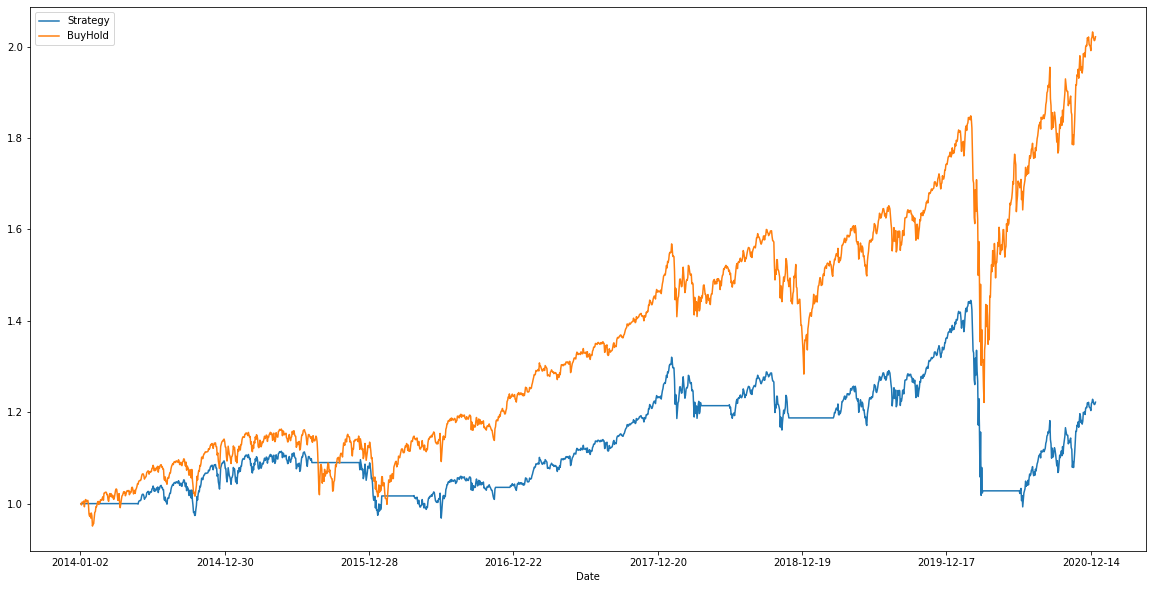

In [18]:
data['BuyHold']=(data['Close'].pct_change(1)+1).cumprod()
data[['Strategy','BuyHold']].plot()